In [97]:
import mysql.connector
from mysql.connector import Error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [98]:
def create_server_connection(host_name, user_name, user_password, Data_base):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database="EHR_Database"
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

pw = "Padhai@1234" # IMPORTANT! Put your MySQL Terminal password here.
db = "EHR_Database" # This is the name of the database we will create in the next step - call it whatever you like.

connection = create_server_connection("localhost", "root", pw, "EHR_Database")

MySQL Database connection successful


In [99]:
def read_query(connection, query):
    cursor = connection.cursor(buffered=True)
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [100]:
def execute_query(connection, query):
    cursor = connection.cursor(buffered=True)
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")


In [101]:
q1 = """
SELECT *
FROM ehr;
"""
connection= create_server_connection("localhost", "root", pw, db)
results = read_query(connection, q1)

#for result in results:
print(results)


MySQL Database connection successful
[(Decimal('35.10000'), Decimal('11.80000'), Decimal('4.65000'), Decimal('6.30000'), Decimal('310.00000'), Decimal('25.40000'), Decimal('33.60000'), Decimal('75.50000'), Decimal('1.00000'), Decimal('1.00000'), Decimal('0.00000'), Decimal('1.00000')), (Decimal('43.50000'), Decimal('14.80000'), Decimal('5.39000'), Decimal('12.70000'), Decimal('334.00000'), Decimal('27.50000'), Decimal('34.00000'), Decimal('80.70000'), Decimal('1.00000'), Decimal('1.00000'), Decimal('0.00000'), Decimal('0.00000')), (Decimal('33.50000'), Decimal('11.30000'), Decimal('4.74000'), Decimal('13.20000'), Decimal('305.00000'), Decimal('23.80000'), Decimal('33.70000'), Decimal('70.70000'), Decimal('1.00000'), Decimal('1.00000'), Decimal('0.00000'), Decimal('1.00000')), (Decimal('39.10000'), Decimal('13.70000'), Decimal('4.98000'), Decimal('10.50000'), Decimal('366.00000'), Decimal('27.50000'), Decimal('35.00000'), Decimal('78.50000'), Decimal('1.00000'), Decimal('1.00000'), Deci

In [102]:
#df =pd.DataFrame(data=results)
df = pd.read_sql("select * from EHR_Database.ehr", connection);
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,HEALTH
0,35.1,11.8,4.65,6.3,310.0,25.4,33.6,75.5,1.0,1.0,0.0,1.0
1,43.5,14.8,5.39,12.7,334.0,27.5,34.0,80.7,1.0,1.0,0.0,0.0
2,33.5,11.3,4.74,13.2,305.0,23.8,33.7,70.7,1.0,1.0,0.0,1.0
3,39.1,13.7,4.98,10.5,366.0,27.5,35.0,78.5,1.0,1.0,0.0,0.0
4,30.9,9.9,4.23,22.1,333.0,23.4,32.0,73.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8819,32.8,10.4,3.49,8.1,72.0,29.8,31.7,94.0,92.0,1.0,1.0,1.0
8820,33.7,10.8,3.67,6.7,70.0,29.4,32.0,91.8,92.0,1.0,1.0,1.0
8821,33.2,11.2,3.47,7.2,235.0,32.3,33.7,95.7,93.0,1.0,0.0,1.0
8822,31.5,10.4,3.15,9.1,187.0,33.0,33.0,100.0,98.0,1.0,1.0,1.0


In [103]:
feature_cols = ['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV','AGE','SEX','SOURCE']
X = df[feature_cols]
X

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310.0,25.4,33.6,75.5,1.0,1.0,0.0
1,43.5,14.8,5.39,12.7,334.0,27.5,34.0,80.7,1.0,1.0,0.0
2,33.5,11.3,4.74,13.2,305.0,23.8,33.7,70.7,1.0,1.0,0.0
3,39.1,13.7,4.98,10.5,366.0,27.5,35.0,78.5,1.0,1.0,0.0
4,30.9,9.9,4.23,22.1,333.0,23.4,32.0,73.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8819,32.8,10.4,3.49,8.1,72.0,29.8,31.7,94.0,92.0,1.0,1.0
8820,33.7,10.8,3.67,6.7,70.0,29.4,32.0,91.8,92.0,1.0,1.0
8821,33.2,11.2,3.47,7.2,235.0,32.3,33.7,95.7,93.0,1.0,0.0
8822,31.5,10.4,3.15,9.1,187.0,33.0,33.0,100.0,98.0,1.0,1.0


In [104]:
y = df['HEALTH']
y

0       1.0
1       0.0
2       1.0
3       0.0
4       2.0
       ... 
8819    1.0
8820    1.0
8821    1.0
8822    1.0
8823    1.0
Name: HEALTH, Length: 8824, dtype: float64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=6)

In [106]:
k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(y_predict)
score = accuracy_score(y_test, y_predict)
print('Accuracy = ' ,score)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 2. 0. 0. 0. 0.
 0. 1. 0. 1. 2. 0. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 2. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 2.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 2. 0. 2. 0. 0. 0. 0. 0. 2. 0.
 0. 1. 0. 1. 0. 0. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1. 0. 1. 0. 2.
 2. 0. 0. 0. 1. 1. 0. 2. 0. 0. 0. 0. 0. 2. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 2. 1. 1. 0. 0. 0. 1. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 2. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 2. 0. 0. 0. 1. 0. 2. 0. 0. 0. 0. 0.
 1. 0. 1. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.

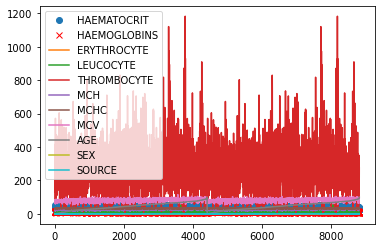

In [107]:
X.plot(style=['o', 'rx'])
plt.show()


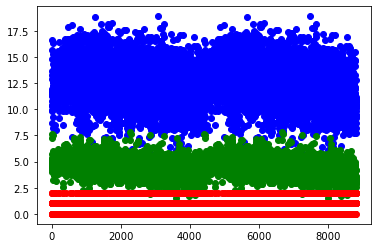

In [108]:
plt.plot(df['HAEMOGLOBINS'].to_numpy(), 'bo')
plt.plot(df['ERYTHROCYTE'].to_numpy(), 'go')
#plt.plot(df['LEUCOCYTE'].to_numpy(), 'co')
#plt.plot(df['THROMBOCYTE'].to_numpy(), 'mo')
plt.plot(df['HEALTH'].to_numpy(), 'ro')


In [ ]:
 -
